In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

### Question 1. Read in the data and review the non-binary variables to see if any are skewed and need to be transformed. If so, transform them and drop the non-transformed versions of the variables. Make sure that you do not include the customer identifier id in your calculations. Explain what you found, what transformations you applied, and why.

In [2]:
# Reading in the dataset
customers = pd.read_csv('/Users/ramyavissapragada/Desktop/buan6383/dmtrain.csv')
customers

,id,n24,rev24,revlast,elpsdm,ordfreq,ordcat,response
0,1,2,30.0,20.0,24,1,6,1
1,2,25,207.0,20.0,24,1,6,0
2,3,5,52.0,15.0,24,1,6,0
3,4,11,105.0,15.0,24,1,6,0
4,5,2,32.0,17.0,24,1,6,0
...,...,...,...,...,...,...,...,...
1995,1996,12,105.0,20.0,1,2,6,0
1996,1997,36,786.0,5.0,1,2,6,0
1997,1998,7,415.0,100.0,1,1,7,0
1998,1999,5,77.0,25.0,1,1,7,0


In [3]:
# Checking for null values
customers.isna().sum()

id          0
n24         0
rev24       0
revlast     0
elpsdm      0
ordfreq     0
ordcat      0
response    0
dtype: int64

In [4]:
# Seeing the data types of the columns in the dataset
customers.dtypes

id            int64
n24           int64
rev24       float64
revlast     float64
elpsdm        int64
ordfreq       int64
ordcat        int64
response      int64
dtype: object

Text(0, 0.5, 'Frequency')

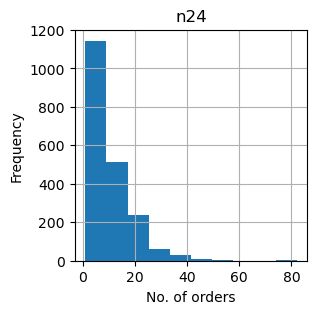

In [5]:
# Plotting the histogram for n24 variable
customers.hist(column=['n24'], bins = 10, figsize = (3,3))
plt.xlabel('No. of orders')
plt.ylabel('Frequency')

In [6]:
# Verifying that n24 is skewed by looking at the median and mean values
n24_median = customers['n24'].median()
n24_median

8.0

In [7]:
# Computing mean for n24 variable.
n24_mean = customers['n24'].mean()
n24_mean
# Median is less than mean so as shown above n24 is right skewed.

10.2855

In [8]:
# Checking if there are any 0s in the column.
has_zerosn24 = (customers['n24'] == 0).any()
has_zerosn24

False

Text(0, 0.5, 'Frequency')

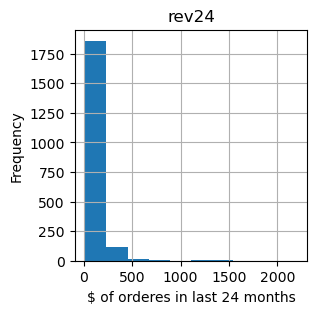

In [9]:
# Plotting the histogram for rev24 variable
customers.hist(column=['rev24'], bins = 10, figsize = (3,3))
plt.xlabel('$ of orderes in last 24 months')
plt.ylabel('Frequency')

In [10]:
# Verifying that rev24 is skewed by looking at the median and mean values
rev24_median = customers['rev24'].median()
rev24_median

80.95

In [11]:
# Computing mean for rev24 variable.
rev24_mean = customers['rev24'].mean()
rev24_mean
# Median is less than mean so as shown above rev24 is right skewed.

107.83089499999998

In [12]:
# Checking if there are any 0s in the column.
has_zerosn24 = (customers['rev24'] == 0).any()
has_zerosn24

False

Text(0, 0.5, 'Frequency')

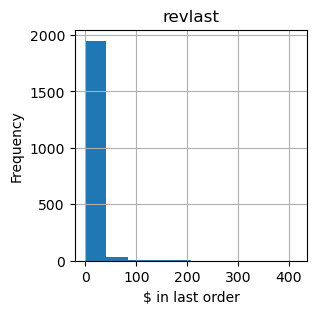

In [13]:
# Plotting the histogram for revlast variable
customers.hist(column=['revlast'], bins = 10, figsize = (3,3))
plt.xlabel('$ in last order')
plt.ylabel('Frequency')

In [14]:
# Verifying that revlast is skewed by looking at the median and mean values
revlast_median = customers['revlast'].median()
revlast_median

15.0

In [15]:
# Computing mean for revlast variable.
revlast_mean = customers['revlast'].mean()
revlast_mean
# Median is less than mean so as shown above revlast is right skewed.

16.863474999999998

In [16]:
# Checking if there are any 0s in the column.
has_zerosrevlast = (customers['revlast'] == 0).any()
has_zerosrevlast

True

In [17]:
# Since revlast column has few 0s in it, we can apply log-transformation after adding a constant of some value. 
# Because applying log function on 0s will result in negative infinity values.
# We chose c = 0.000001
c = 0.000001
customers['log_revlast'] = np.log(customers['revlast'] + c)

Text(0, 0.5, 'Frequency')

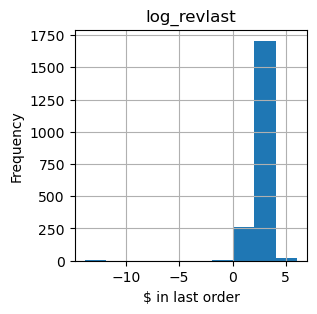

In [18]:
# Plotting the graph for log-revlast. i.e, after transforming the revlast variable.
customers.hist(column=['log_revlast'], bins = 10, figsize = (3,3))
plt.xlabel('$ in last order')
plt.ylabel('Frequency')

In [19]:
# Displaying the dataset 
customers

,id,n24,rev24,revlast,elpsdm,ordfreq,ordcat,response,log_revlast
0,1,2,30.0,20.0,24,1,6,1,2.995732
1,2,25,207.0,20.0,24,1,6,0,2.995732
2,3,5,52.0,15.0,24,1,6,0,2.708050
3,4,11,105.0,15.0,24,1,6,0,2.708050
4,5,2,32.0,17.0,24,1,6,0,2.833213
...,...,...,...,...,...,...,...,...,...
1995,1996,12,105.0,20.0,1,2,6,0,2.995732
1996,1997,36,786.0,5.0,1,2,6,0,1.609438
1997,1998,7,415.0,100.0,1,1,7,0,4.605170
1998,1999,5,77.0,25.0,1,1,7,0,3.218876


In [20]:
# Verifying the above symmetric histogram of log_revlast by looking at its median and mean values:
logrevlast_median = customers['log_revlast'].median()
logrevlast_median

2.7080502677688743

In [21]:
# Computing mean for log_revlast variable.
logrevlast_mean = customers['log_revlast'].mean()
logrevlast_mean
# Mean and Median values for log_revlast are similar hence log_revlast is symmetric as seen in the histogram above too.

2.577369034296071

Text(0, 0.5, 'Frequency')

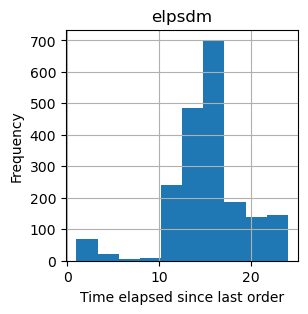

In [22]:
# Plotting the histogram for elpsdm variable
customers.hist(column=['elpsdm'], bins = 10, figsize = (3,3))
plt.xlabel('Time elapsed since last order')
plt.ylabel('Frequency')

In [23]:
# Verifying that elpsdm is symmetric by looking at the median and mean values
elpt_median = customers['elpsdm'].median()
elpt_median

15.0

In [24]:
# Computing mean for elpsdm variable.
elpt_mean = customers['elpsdm'].mean()
elpt_mean
# Mean and Median values for elpsdm are similar hence elpsdm is symmetric as seen in the histogram above too.

15.111

In [25]:
# Checking if there are any 0s in the column.
has_zeroselpsdm = (customers['elpsdm'] == 0).any()
has_zeroselpsdm

False

Text(0, 0.5, 'Frequency')

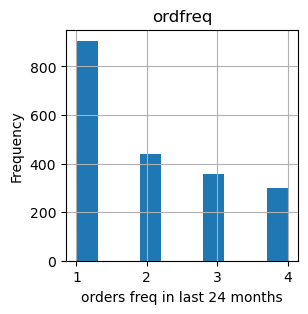

In [26]:
# Plotting the histogram for ordfreq variable
customers.hist(column=['ordfreq'], bins = 10, figsize = (3,3))
plt.xlabel('orders freq in last 24 months')
plt.ylabel('Frequency')

In [27]:
# Generating the counts of each category in ordfreq
customers['ordfreq'].value_counts()

1    906
2    439
3    356
4    299
Name: ordfreq, dtype: int64

Text(0, 0.5, 'Frequency')

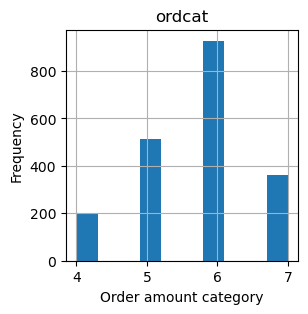

In [28]:
# Plotting the histogram for ordcat variable
customers.hist(column=['ordcat'], bins = 10, figsize = (3,3))
plt.xlabel('Order amount category')
plt.ylabel('Frequency')

In [29]:
# Since the columns n24, rev24 are skewed, we will apply log-transformations on them.
# We have already applied log-transformation on revlast column above. Hence excluding that here.

columns = ['n24', 'rev24']
for col in columns:
        customers['log_' + col] = np.log(customers[col])

In [30]:
# Dropping the columns as we transformed and added the transformed-columns
customers = customers.drop(['n24', 'rev24', 'revlast', 'id'], axis = 1)
customers

,elpsdm,ordfreq,ordcat,response,log_revlast,log_n24,log_rev24
0,24,1,6,1,2.995732,0.693147,3.401197
1,24,1,6,0,2.995732,3.218876,5.332719
2,24,1,6,0,2.708050,1.609438,3.951244
3,24,1,6,0,2.708050,2.397895,4.653960
4,24,1,6,0,2.833213,0.693147,3.465736
...,...,...,...,...,...,...,...
1995,1,2,6,0,2.995732,2.484907,4.653960
1996,1,2,6,0,1.609438,3.583519,6.666957
1997,1,1,7,0,4.605170,1.945910,6.028279
1998,1,1,7,0,3.218876,1.609438,4.343805


Text(0, 0.5, 'Frequency')

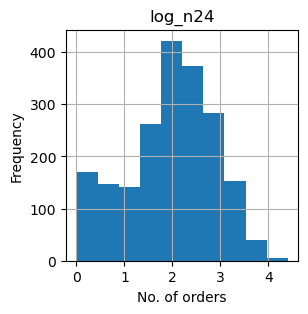

In [31]:
# Plotting graphs of the transformed columns:
# Histogram of log_n24
customers.hist(column=['log_n24'], bins = 10, figsize = (3,3))
plt.xlabel('No. of orders')
plt.ylabel('Frequency')

In [32]:
# Verifying the above symmetric histogram of log_n24 by looking at its median and mean values:
logn24_median = customers['log_n24'].median()
logn24_median

2.0794415416798357

In [33]:
# Computing mean for log_n24 variable.
logn24_mean = customers['log_n24'].mean()
logn24_mean
# Mean and Median values for log_n24 are similar hence log_n24 is symmetric as seen in the histogram above too.

1.9467622665434388

Text(0, 0.5, 'Frequency')

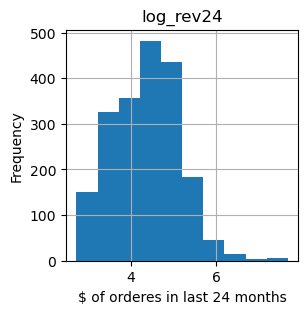

In [34]:
# Histogram of log_rev24
customers.hist(column=['log_rev24'], bins = 10, figsize = (3,3))
plt.xlabel('$ of orderes in last 24 months')
plt.ylabel('Frequency')

In [35]:
# Verifying the above symmetric histogram of log_rev24 by looking at its median and mean values:
logrev24_median = customers['log_rev24'].median()
logrev24_median

4.393831489368443

In [36]:
# Computing mean for log_rev24 variable.
logrev24_mean = customers['log_rev24'].mean()
logrev24_mean
# Mean and Median values for log_rev24 are similar hence log_rev24 is symmetric as seen in the histogram above too.

4.340269247021917

In [37]:
# Looking into revlast column
# We are having negative values as the original dataset had 0s and log transforming gave negative infinity values so we added a small constant to avoid this issue.
has_negative_values = customers[customers['log_revlast'] <0]
has_negative_values

,elpsdm,ordfreq,ordcat,response,log_revlast,log_n24,log_rev24
1900,8,1,5,1,-13.815511,2.708050,4.962845
1923,4,2,5,1,-13.815511,2.397895,4.158883
1959,2,1,5,0,-13.815511,2.708050,5.170484
1962,2,1,6,0,-13.815511,2.197225,4.248495
1968,2,1,6,0,-13.815511,1.609438,4.317488
1972,1,1,5,1,-13.815511,2.833213,4.990433
1986,1,1,6,0,-13.815511,0.000000,2.995732
1989,1,4,5,0,-13.815511,3.637586,5.549076


### Question 2. Generate a decision tree on the entire dataset, without any limitations on the depth of the tree. Use entropy as the metric. What is the depth of the tree that is generated? Provide a plot of the tree.

In [38]:
# Looking into the customers dataset
customers

,elpsdm,ordfreq,ordcat,response,log_revlast,log_n24,log_rev24
0,24,1,6,1,2.995732,0.693147,3.401197
1,24,1,6,0,2.995732,3.218876,5.332719
2,24,1,6,0,2.708050,1.609438,3.951244
3,24,1,6,0,2.708050,2.397895,4.653960
4,24,1,6,0,2.833213,0.693147,3.465736
...,...,...,...,...,...,...,...
1995,1,2,6,0,2.995732,2.484907,4.653960
1996,1,2,6,0,1.609438,3.583519,6.666957
1997,1,1,7,0,4.605170,1.945910,6.028279
1998,1,1,7,0,3.218876,1.609438,4.343805


In [39]:
# Separating the dependent variable response.
y = customers['response'].to_numpy()

In [40]:
# Taking all independent variables together separately.
x = customers.copy()
x = x.drop(['response'], axis = 1)
x

,elpsdm,ordfreq,ordcat,log_revlast,log_n24,log_rev24
0,24,1,6,2.995732,0.693147,3.401197
1,24,1,6,2.995732,3.218876,5.332719
2,24,1,6,2.708050,1.609438,3.951244
3,24,1,6,2.708050,2.397895,4.653960
4,24,1,6,2.833213,0.693147,3.465736
...,...,...,...,...,...,...
1995,1,2,6,2.995732,2.484907,4.653960
1996,1,2,6,1.609438,3.583519,6.666957
1997,1,1,7,4.605170,1.945910,6.028279
1998,1,1,7,3.218876,1.609438,4.343805


In [41]:
# Generating the Decision Tree on the entire dataset based on entropy metric
dtreefull = DecisionTreeClassifier(criterion='entropy')
dtreefull.fit(x, y)
print('Decision Tree Classifier Generated full')

Decision Tree Classifier Generated full


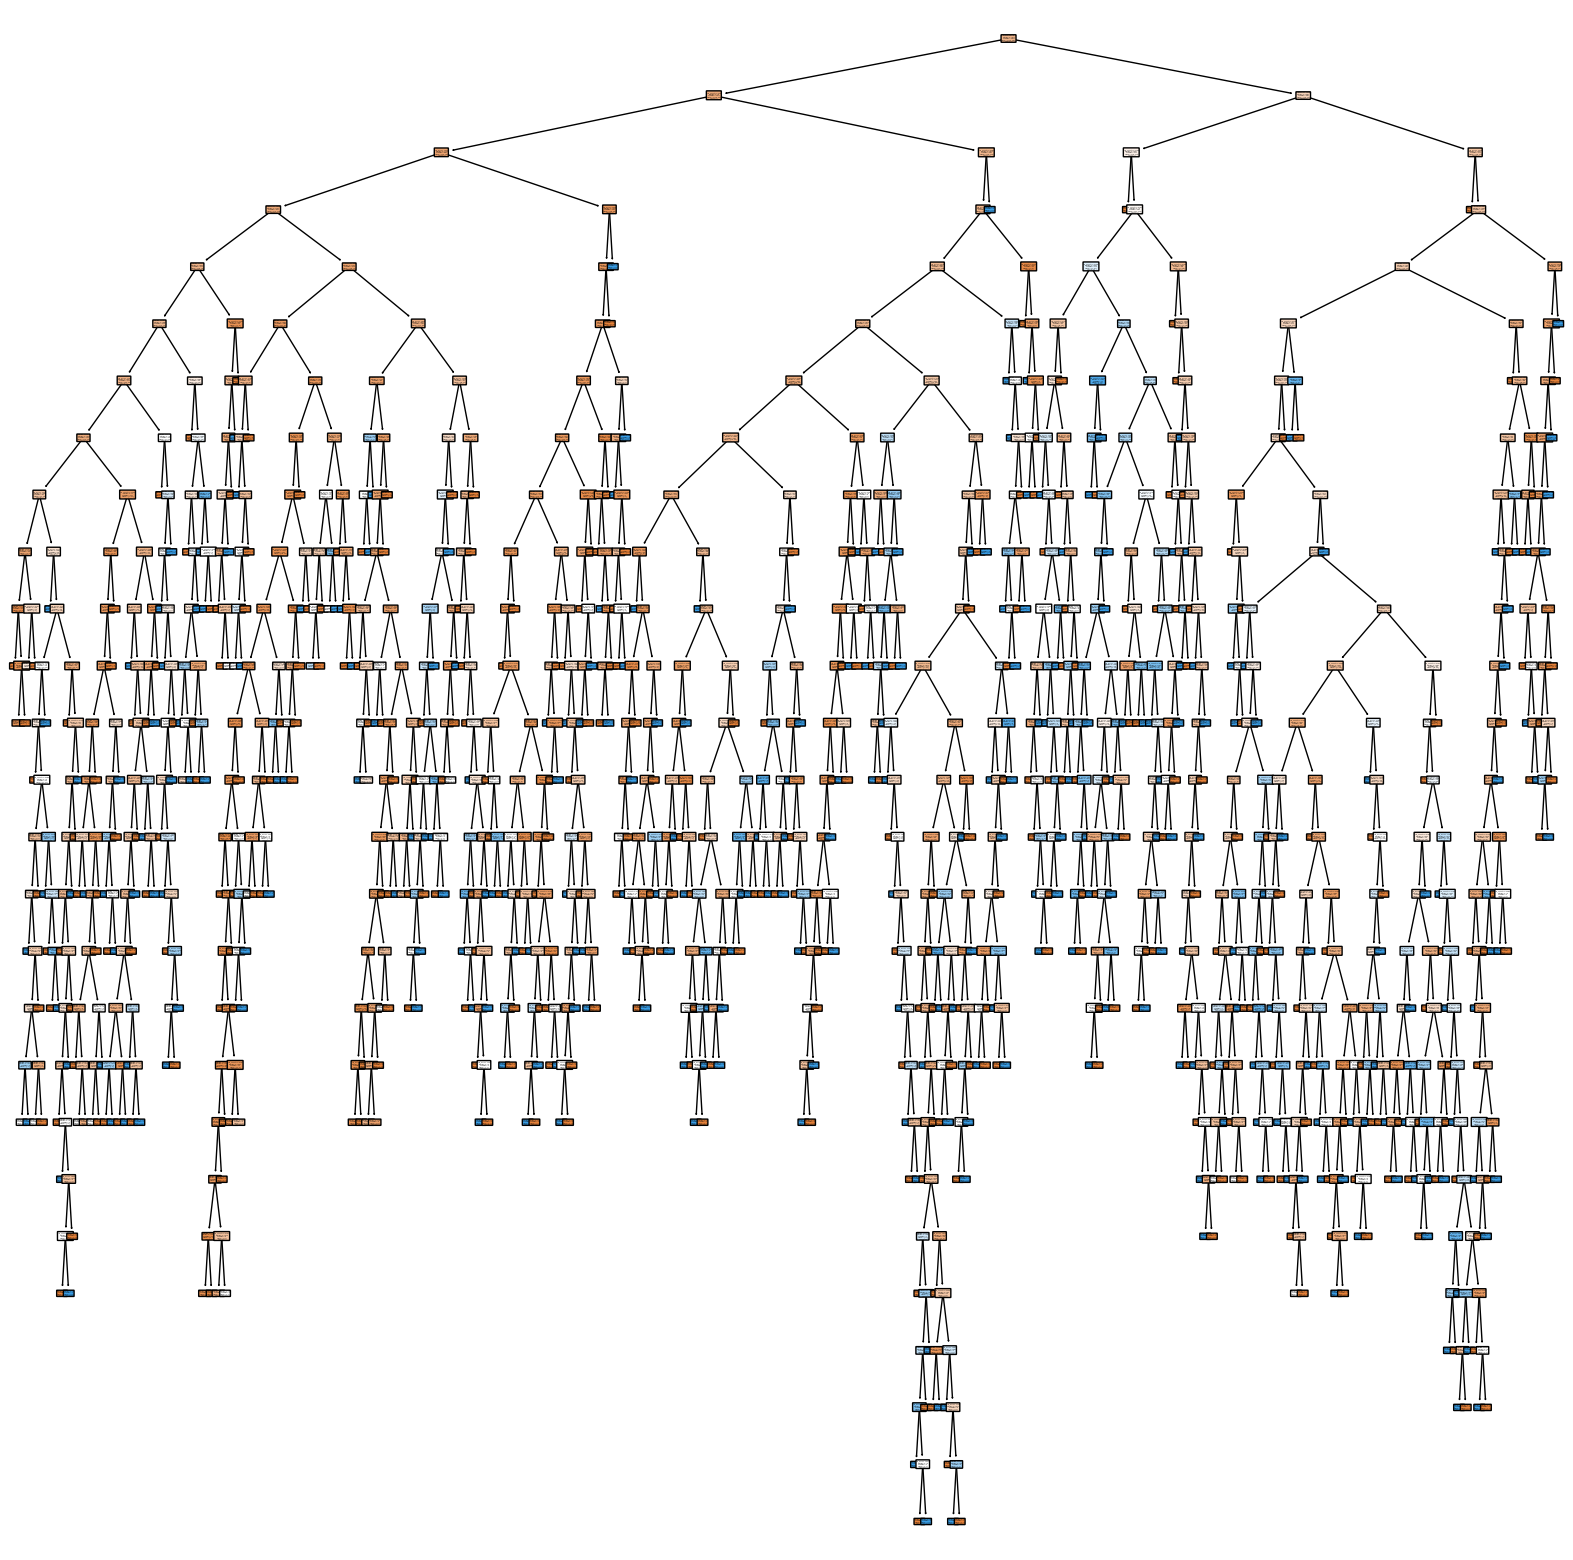

In [42]:
# Plotting the decision tree.
plt.figure(figsize = (20, 20))
# cnames = ['log_revlast', 'elpsdm', 'ordfreq', 'ordcat', 'log_n24', 'log_rev24']
dec_treefull = plot_tree(decision_tree=dtreefull, feature_names=(customers.columns.to_list()), class_names=['no', 'yes'], filled = True, rounded = True)

In [43]:
# Calculating the depth of the decision tree generated above.
depthfull = dtreefull.tree_.max_depth
depthfull

26

### Question 3. We will focus on decision trees first, and try to identify the best decision tree classifier by pruning the tree at different depths. Use 10-fold cross validation and identify the best tree depth (again, using accuracy as the metric), by trying as many possible depths as you deem necessary. Provide your reasoning for using the values of tree-depth that you tried. Based on your results, what depth do you recommend? What is the accuracy associated with this tree depth? If you had to select the three best values of tree-depth, what would they be?

In [44]:
# Separating the dependent variable response.
y_10fold = customers['response'].to_numpy()

In [45]:
# Taking all independent variables together separately.
x_10fold = customers.copy()
x_10fold = x_10fold.drop(['response'], axis = 1)
x_10fold

,elpsdm,ordfreq,ordcat,log_revlast,log_n24,log_rev24
0,24,1,6,2.995732,0.693147,3.401197
1,24,1,6,2.995732,3.218876,5.332719
2,24,1,6,2.708050,1.609438,3.951244
3,24,1,6,2.708050,2.397895,4.653960
4,24,1,6,2.833213,0.693147,3.465736
...,...,...,...,...,...,...
1995,1,2,6,2.995732,2.484907,4.653960
1996,1,2,6,1.609438,3.583519,6.666957
1997,1,1,7,4.605170,1.945910,6.028279
1998,1,1,7,3.218876,1.609438,4.343805


In [46]:
# Performing k-fold cross validation (where k = 10 in our case)
kf = KFold(n_splits = 10, shuffle = True, random_state = 1)
print(kf)

KFold(n_splits=10, random_state=1, shuffle=True)


In [47]:
# Displaying the 10 folds. (Showing which records went into which fold)
fold = 1
for i, j in kf.split(x_10fold, y_10fold):
    
    print('fold', fold)
    print('training: ', i, 'size: ', len(i))
    print('test: ', j, 'size: ', len(j))
    fold += 1

fold 1
training:  [   0    1    2 ... 1997 1998 1999] size:  1800
test:  [  47   48   56   75   87  102  108  111  120  126  137  161  169  177
  181  186  190  192  194  231  236  258  270  275  282  285  304  309
  321  325  348  367  372  375  382  389  406  442  447  478  480  486
  510  512  525  535  555  558  560  563  573  577  587  612  613  623
  625  631  654  655  661  671  674  675  692  693  697  698  700  701
  718  729  730  745  748  761  764  774  808  827  846  857  858  868
  872  874  877  881  887  899  926  927  950  972  986  987  993  994
 1015 1027 1028 1044 1053 1058 1065 1068 1071 1073 1086 1087 1100 1109
 1131 1135 1138 1146 1149 1166 1167 1210 1215 1219 1227 1228 1231 1237
 1243 1247 1256 1262 1264 1265 1270 1282 1291 1297 1314 1315 1334 1342
 1369 1402 1406 1415 1418 1421 1428 1437 1440 1443 1464 1468 1480 1482
 1496 1518 1540 1547 1551 1561 1567 1595 1602 1610 1618 1624 1632 1636
 1647 1657 1678 1682 1685 1688 1691 1699 1701 1712 1728 1761 1786 1807
 181

In [48]:
# Defining list of depths to be tested. We are taking 1 to 20 as the range of depth values.
depths = range(1, 21)

# Creating a dictionary to store mean accuracies for each depth.
depth_accuracies = {}
depth_std_dev = {}

# Creating a dictionary to store individual accuracies for each depth respectively
depth_individual_accuracies = {}


# Performing cross validation hrough each depth taken in the for loop.
for depth in depths:
    # Generating a Decision Tree Classifier for each depth.
    clf = DecisionTreeClassifier(max_depth=depth)
    
    # Performing 10-fold cross-validation and computing the accuracy scores.
    cv_scores = cross_val_score(clf, x_10fold, y_10fold, cv=kf, scoring='accuracy')
    
    # Calculating the mean accuracy
    mean_accuracy = np.mean(cv_scores)
    
    # Calculating standard deviations:
    std_dev_accuracy = np.std(cv_scores)
    
    # Store the mean accuracy in the dictionary
    depth_accuracies[depth] = mean_accuracy
    depth_std_dev[depth] = std_dev_accuracy

    # Store individual accuracies in the dictionary
    depth_individual_accuracies[depth] = cv_scores
    
    print(f"Depth {depth} - Mean Accuracy: {mean_accuracy}")
    print(f"Standard Deviation: {std_dev_accuracy}")
    print(f"Individual Accuracies: {cv_scores}\n")

# Find the best depth based on accuracy
best_depth = max(depth_accuracies, key=depth_accuracies.get)

print("Best depth based on accuracy:", best_depth)


Depth 1 - Mean Accuracy: 0.708
Standard Deviation: 0.0373630833845388
Individual Accuracies: [0.745 0.67  0.685 0.7   0.74  0.675 0.71  0.645 0.75  0.76 ]

Depth 2 - Mean Accuracy: 0.7064999999999999
Standard Deviation: 0.03853894134508626
Individual Accuracies: [0.745 0.67  0.67  0.7   0.74  0.675 0.71  0.645 0.75  0.76 ]

Depth 3 - Mean Accuracy: 0.699
Standard Deviation: 0.03345145736735545
Individual Accuracies: [0.755 0.67  0.675 0.7   0.72  0.665 0.69  0.65  0.72  0.745]

Depth 4 - Mean Accuracy: 0.703
Standard Deviation: 0.04428317965096905
Individual Accuracies: [0.76  0.67  0.65  0.695 0.745 0.665 0.705 0.64  0.73  0.77 ]

Depth 5 - Mean Accuracy: 0.6965
Standard Deviation: 0.041294672779911924
Individual Accuracies: [0.755 0.66  0.665 0.675 0.73  0.665 0.71  0.635 0.705 0.765]

Depth 6 - Mean Accuracy: 0.69
Standard Deviation: 0.0342782730020052
Individual Accuracies: [0.725 0.665 0.665 0.67  0.72  0.67  0.675 0.64  0.715 0.755]

Depth 7 - Mean Accuracy: 0.69
Standard Deviati

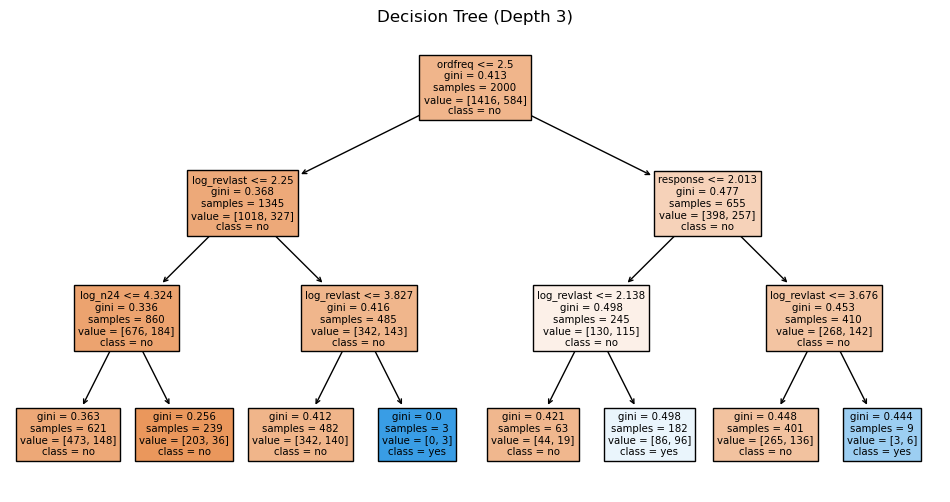

In [49]:
# Visualizing the decision tree of depth 3.
depth = 3  
clf = DecisionTreeClassifier(max_depth=depth)

# Fitting the classifier.
clf.fit(x_10fold, y_10fold) 

# Plotting the decision tree
plt.figure(figsize=(12, 6))
plot_tree(clf, filled=True, feature_names=(customers.columns.to_list()), class_names=['no', 'yes'])
plt.title(f'Decision Tree (Depth {depth})')
plt.show()

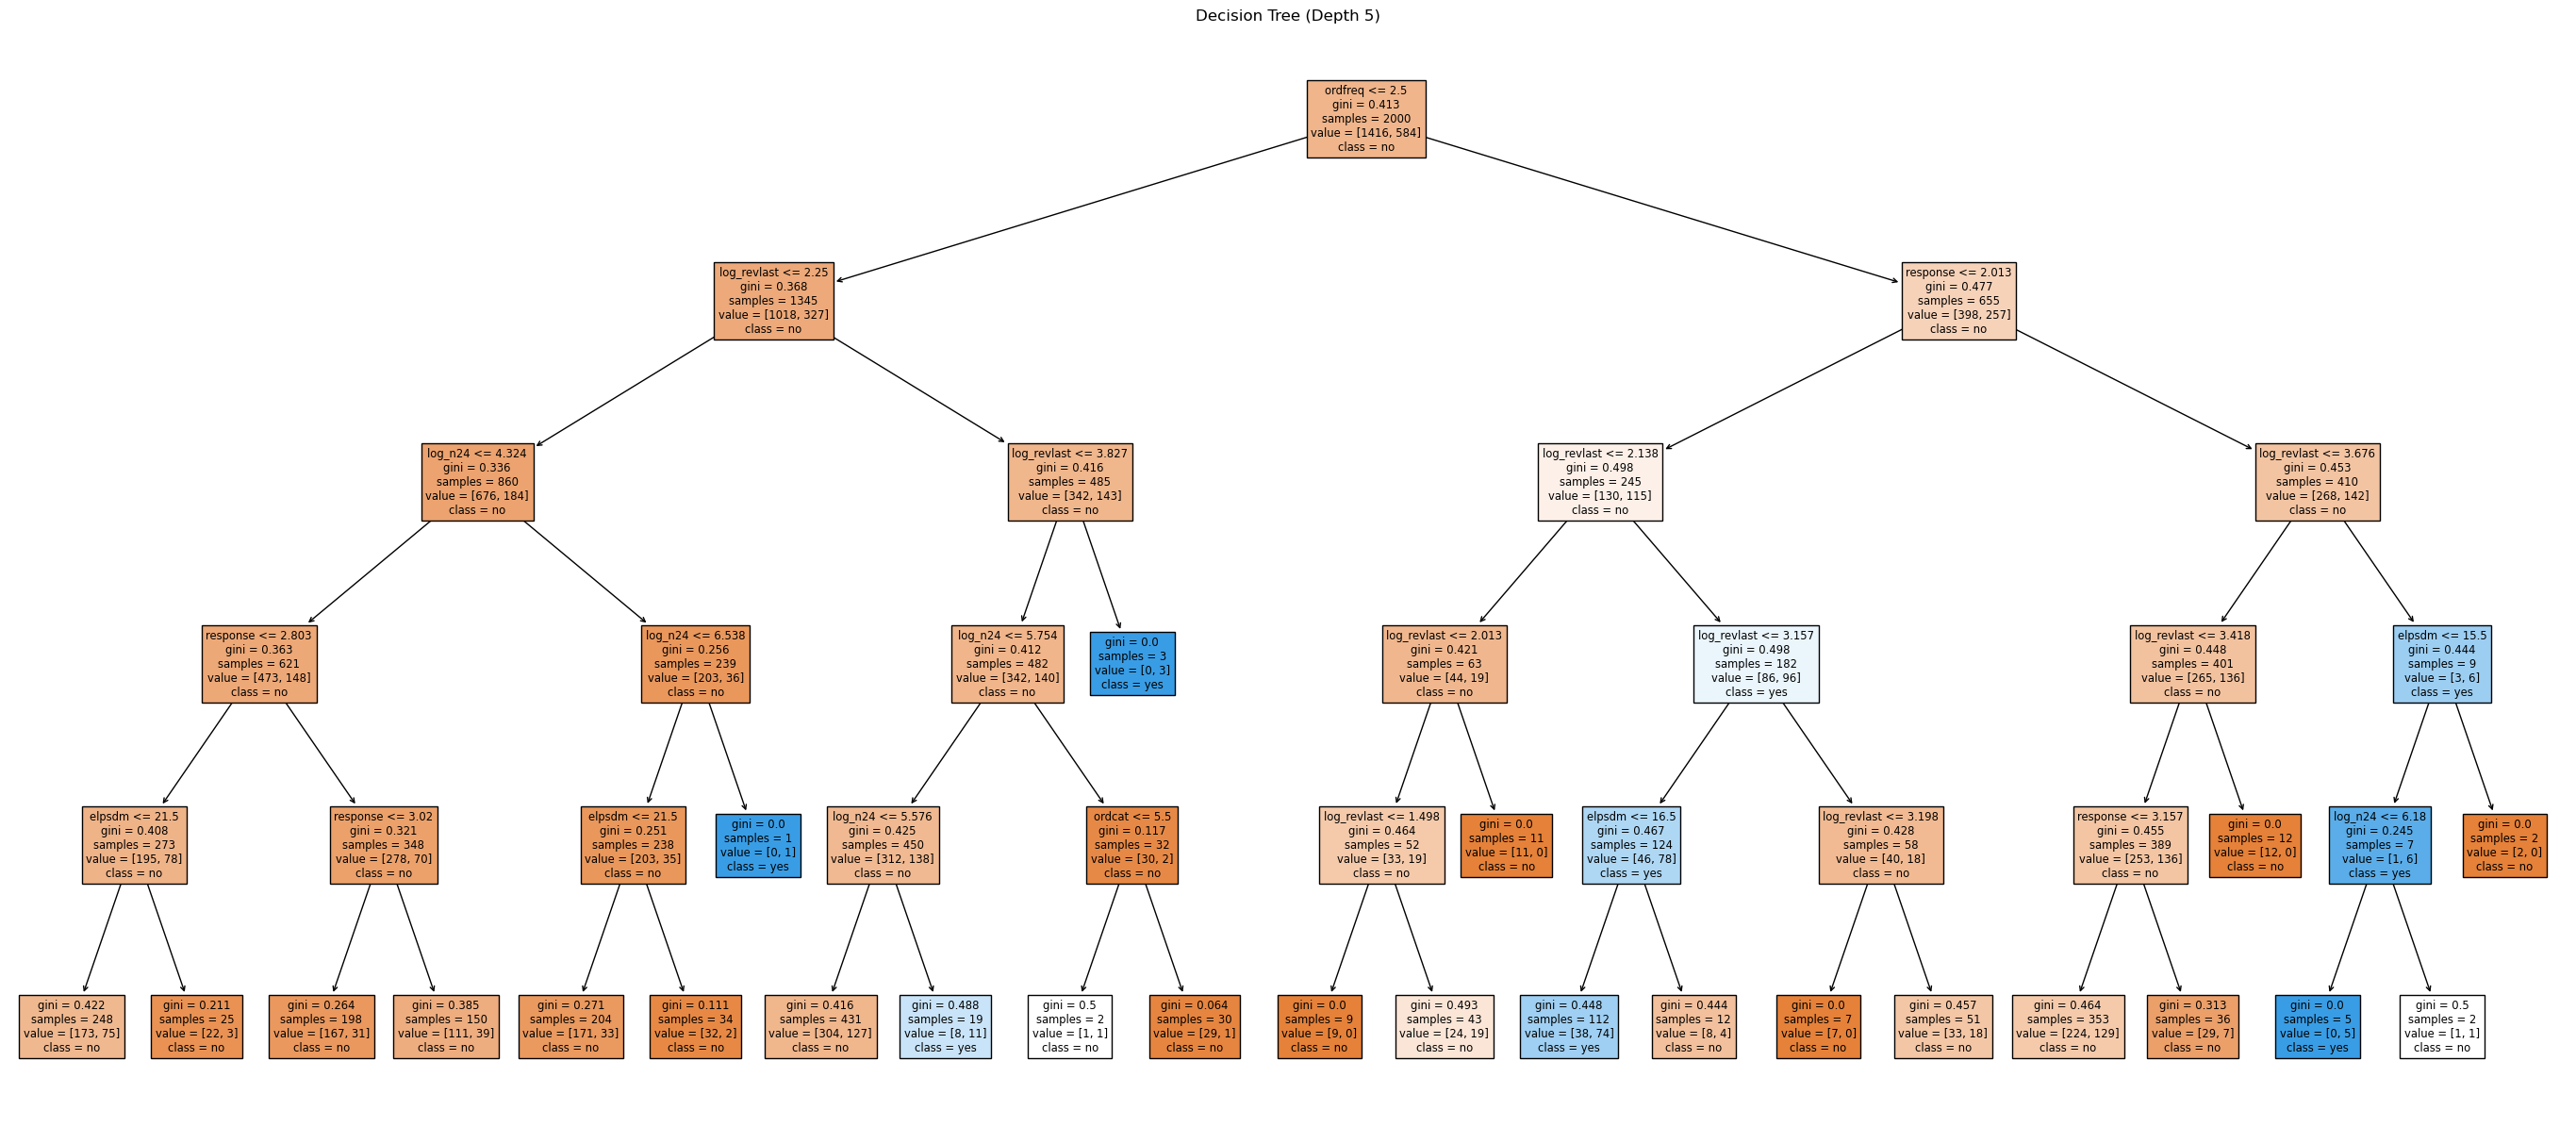

In [50]:
# Visualizing the decision tree of depth 3.
depth = 5
clf = DecisionTreeClassifier(max_depth=depth)

# Fitting the classifier.
clf.fit(x_10fold, y_10fold) 

# Plotting the decision tree
plt.figure(figsize=(35,15))
plot_tree(clf, filled=True, feature_names=(customers.columns.to_list()), class_names=['no', 'yes'])
plt.title(f'Decision Tree (Depth {depth})')
plt.show()

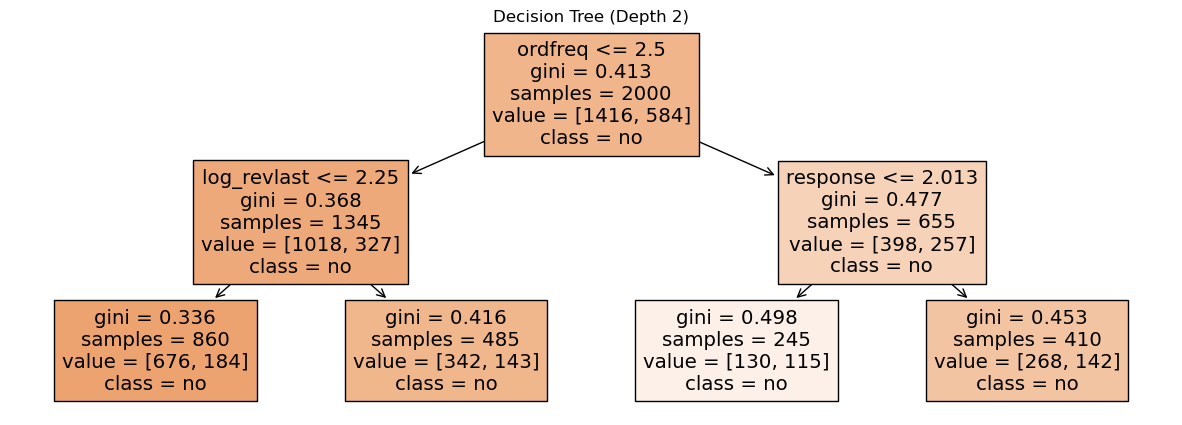

In [51]:
# Visualizing the decision tree of depth 2.
depth = 2
clf = DecisionTreeClassifier(max_depth=depth)

# Fitting the classifier.
clf.fit(x_10fold, y_10fold)  

# Plotting the decision tree
plt.figure(figsize=(15,5))
plot_tree(clf, filled=True, feature_names=(customers.columns.to_list()), class_names=['no', 'yes'])
plt.title(f'Decision Tree (Depth {depth})')
plt.show()

### Question 4.  Next, we will consider random forests. Develop a random forest classifier with 100 trees, using the three best values of tree-depth you identified in the previous question. Provide all relevant results. Which tree-depth results in the best random forest classifier? How does it perform relative to the best decision tree?

In [52]:
# Separating the dependent variable response.
y_rf = customers['response'].to_numpy()

In [53]:
# Taking all independent variables together separately.
x_rf = customers.copy()
x_rf = x_rf.drop(['response'], axis = 1)
x_rf

,elpsdm,ordfreq,ordcat,log_revlast,log_n24,log_rev24
0,24,1,6,2.995732,0.693147,3.401197
1,24,1,6,2.995732,3.218876,5.332719
2,24,1,6,2.708050,1.609438,3.951244
3,24,1,6,2.708050,2.397895,4.653960
4,24,1,6,2.833213,0.693147,3.465736
...,...,...,...,...,...,...
1995,1,2,6,2.995732,2.484907,4.653960
1996,1,2,6,1.609438,3.583519,6.666957
1997,1,1,7,4.605170,1.945910,6.028279
1998,1,1,7,3.218876,1.609438,4.343805


In [54]:
# Performing k-fold cross validation (where k = 10 in our case)
kf_rf = KFold(n_splits = 10, shuffle = True, random_state = 1)
print(kf_rf)

KFold(n_splits=10, random_state=1, shuffle=True)


In [55]:
# Displaying the 10 folds. (Showing which records went into which fold)
fold_rf = 1
for i, j in kf_rf.split(x_rf, y_rf):
    
    print('fold', fold_rf)
    print('training: ', i, 'size: ', len(i))
    print('test: ', j, 'size: ', len(j))
    fold_rf += 1

fold 1
training:  [   0    1    2 ... 1997 1998 1999] size:  1800
test:  [  47   48   56   75   87  102  108  111  120  126  137  161  169  177
  181  186  190  192  194  231  236  258  270  275  282  285  304  309
  321  325  348  367  372  375  382  389  406  442  447  478  480  486
  510  512  525  535  555  558  560  563  573  577  587  612  613  623
  625  631  654  655  661  671  674  675  692  693  697  698  700  701
  718  729  730  745  748  761  764  774  808  827  846  857  858  868
  872  874  877  881  887  899  926  927  950  972  986  987  993  994
 1015 1027 1028 1044 1053 1058 1065 1068 1071 1073 1086 1087 1100 1109
 1131 1135 1138 1146 1149 1166 1167 1210 1215 1219 1227 1228 1231 1237
 1243 1247 1256 1262 1264 1265 1270 1282 1291 1297 1314 1315 1334 1342
 1369 1402 1406 1415 1418 1421 1428 1437 1440 1443 1464 1468 1480 1482
 1496 1518 1540 1547 1551 1561 1567 1595 1602 1610 1618 1624 1632 1636
 1647 1657 1678 1682 1685 1688 1691 1699 1701 1712 1728 1761 1786 1807
 181

In [56]:
# Taking the best 3 depths from the last question
depths_rf = [3, 5, 2]

# Initializing dictionaries for the results.
rf_models = {}
rf_scores = {}

# Performing Random Forest Classification with 100 trees and scoring them based on accuracy metric.
for depth in depths_rf:
    rf_100 = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=1)
    scores = cross_val_score(rf_100, x_rf, y_rf, cv=kf_rf, scoring='accuracy') 
    rf_models[depth] = rf_100
    rf_scores[depth] = scores
    
# Displaying the mean accuracy and standard deviations for the respective tree depths.
for depth, scores in rf_scores.items():
    mean_accuracy = np.mean(scores)
    std_deviation = np.std(scores)
    print(f"Depth {depth}: Mean Accuracy: {mean_accuracy}, Std Deviation: {std_deviation}")

Depth 3: Mean Accuracy: 0.7114999999999999, Std Deviation: 0.03918226639693012
Depth 5: Mean Accuracy: 0.714, Std Deviation: 0.033600595232822876
Depth 2: Mean Accuracy: 0.7074999999999999, Std Deviation: 0.03822629984709479


### Question 5. Repeat this experiment with 50 trees. Provide all relevant results. Does your recommendation change? 

In [57]:
# Separating the dependent variable response.
y_rf50 = customers['response'].to_numpy()

In [58]:
# Taking all independent variables together separately.
x_rf50 = customers.copy()
x_rf50 = x_rf50.drop(['response'], axis = 1)
x_rf50

,elpsdm,ordfreq,ordcat,log_revlast,log_n24,log_rev24
0,24,1,6,2.995732,0.693147,3.401197
1,24,1,6,2.995732,3.218876,5.332719
2,24,1,6,2.708050,1.609438,3.951244
3,24,1,6,2.708050,2.397895,4.653960
4,24,1,6,2.833213,0.693147,3.465736
...,...,...,...,...,...,...
1995,1,2,6,2.995732,2.484907,4.653960
1996,1,2,6,1.609438,3.583519,6.666957
1997,1,1,7,4.605170,1.945910,6.028279
1998,1,1,7,3.218876,1.609438,4.343805


In [59]:
# Performing k-fold cross validation (where k = 10 in our case)
kf_rf50 = KFold(n_splits = 10, shuffle = True, random_state = 1)
print(kf_rf50)

KFold(n_splits=10, random_state=1, shuffle=True)


In [60]:
# Displaying the 10 folds. (Showing which records went into which fold)
fold_rf50 = 1
for i, j in kf_rf50.split(x_rf50, y_rf50):
    
    print('fold', fold_rf50)
    print('training: ', i, 'size: ', len(i))
    print('test: ', j, 'size: ', len(j))
    fold_rf50 += 1

fold 1
training:  [   0    1    2 ... 1997 1998 1999] size:  1800
test:  [  47   48   56   75   87  102  108  111  120  126  137  161  169  177
  181  186  190  192  194  231  236  258  270  275  282  285  304  309
  321  325  348  367  372  375  382  389  406  442  447  478  480  486
  510  512  525  535  555  558  560  563  573  577  587  612  613  623
  625  631  654  655  661  671  674  675  692  693  697  698  700  701
  718  729  730  745  748  761  764  774  808  827  846  857  858  868
  872  874  877  881  887  899  926  927  950  972  986  987  993  994
 1015 1027 1028 1044 1053 1058 1065 1068 1071 1073 1086 1087 1100 1109
 1131 1135 1138 1146 1149 1166 1167 1210 1215 1219 1227 1228 1231 1237
 1243 1247 1256 1262 1264 1265 1270 1282 1291 1297 1314 1315 1334 1342
 1369 1402 1406 1415 1418 1421 1428 1437 1440 1443 1464 1468 1480 1482
 1496 1518 1540 1547 1551 1561 1567 1595 1602 1610 1618 1624 1632 1636
 1647 1657 1678 1682 1685 1688 1691 1699 1701 1712 1728 1761 1786 1807
 181

In [61]:
# Taking the best 3 depths from the 3rd question
depths_rf50 = [3, 5, 2]

# Initializing empty dictionaries for the results.
rf50_models = {}
rf50_scores = {}

# Performing Random Forest Classification with 50 trees and scoring them based on accuracy metric.
for depth in depths_rf50:
    rf_50 = RandomForestClassifier(n_estimators=50, max_depth=depth, random_state=1)
    scores_50 = cross_val_score(rf_50, x_rf50, y_rf50, cv=kf_rf50, scoring='accuracy') 
    rf50_models[depth] = rf_50
    rf50_scores[depth] = scores_50
    
# Displaying the mean accuracy and standard deviations for the respective tree depths.
for depth, scores_50 in rf50_scores.items():
    mean_accuracy50 = np.mean(scores_50)
    std_deviation50 = np.std(scores_50)
    print(f"Depth {depth}: Mean Accuracy: {mean_accuracy50}, Std Deviation: {std_deviation50}")

Depth 3: Mean Accuracy: 0.7140000000000001, Std Deviation: 0.03699999999999999
Depth 5: Mean Accuracy: 0.716, Std Deviation: 0.03299999999999999
Depth 2: Mean Accuracy: 0.7074999999999999, Std Deviation: 0.03822629984709479


### Question 6. We will now consider k-nearest neighbor models. Use 10-fold cross validation and identify the best value of k, by trying as many values of k as necessary. Keep in mind that very large values of k can affect speed, and that 5 is the default – try at least values from 5 to 10 (you can try more if you wish). Provide all relevant results. What value of k do you recommend? What is the accuracy associated with this value of k? If you had to select the three best values of k, what would they be? 

In [62]:
# Separating the dependent variable response.
y_knn = customers['response'].to_numpy()

In [63]:
# Taking all independent variables together separately.
x_knn = customers.copy()
x_knn = x_knn.drop(['response'], axis = 1)
x_knn

,elpsdm,ordfreq,ordcat,log_revlast,log_n24,log_rev24
0,24,1,6,2.995732,0.693147,3.401197
1,24,1,6,2.995732,3.218876,5.332719
2,24,1,6,2.708050,1.609438,3.951244
3,24,1,6,2.708050,2.397895,4.653960
4,24,1,6,2.833213,0.693147,3.465736
...,...,...,...,...,...,...
1995,1,2,6,2.995732,2.484907,4.653960
1996,1,2,6,1.609438,3.583519,6.666957
1997,1,1,7,4.605170,1.945910,6.028279
1998,1,1,7,3.218876,1.609438,4.343805


In [64]:
# Performing k-fold cross validation (where k = 10 in our case)
kf_knn = KFold(n_splits = 10, shuffle = True, random_state = 1)
print(kf_knn)

KFold(n_splits=10, random_state=1, shuffle=True)


In [65]:
# Displaying the 10 folds. (Showing which records went into which fold)
fold_knn = 1
for i, j in kf_knn.split(x_knn, y_knn):
    
    print('fold', fold_knn)
    print('training: ', i, 'size: ', len(i))
    print('test: ', j, 'size: ', len(j))
    fold_knn += 1

fold 1
training:  [   0    1    2 ... 1997 1998 1999] size:  1800
test:  [  47   48   56   75   87  102  108  111  120  126  137  161  169  177
  181  186  190  192  194  231  236  258  270  275  282  285  304  309
  321  325  348  367  372  375  382  389  406  442  447  478  480  486
  510  512  525  535  555  558  560  563  573  577  587  612  613  623
  625  631  654  655  661  671  674  675  692  693  697  698  700  701
  718  729  730  745  748  761  764  774  808  827  846  857  858  868
  872  874  877  881  887  899  926  927  950  972  986  987  993  994
 1015 1027 1028 1044 1053 1058 1065 1068 1071 1073 1086 1087 1100 1109
 1131 1135 1138 1146 1149 1166 1167 1210 1215 1219 1227 1228 1231 1237
 1243 1247 1256 1262 1264 1265 1270 1282 1291 1297 1314 1315 1334 1342
 1369 1402 1406 1415 1418 1421 1428 1437 1440 1443 1464 1468 1480 1482
 1496 1518 1540 1547 1551 1561 1567 1595 1602 1610 1618 1624 1632 1636
 1647 1657 1678 1682 1685 1688 1691 1699 1701 1712 1728 1761 1786 1807
 181

In [66]:
# Taking k values as suggested in the question.
kvalues = [5, 6, 7, 8, 9, 10]

# Initializing dictionaries for the results.
knn_models = {}
knn_scores = {}

# Performing the KNN Classification iterating through each value of k, with accuracy as metric.
for k in kvalues:
    knn = KNeighborsClassifier(n_neighbors=k)
    kscores = cross_val_score(knn, x_knn, y_knn, cv=kf_knn, scoring='accuracy')  
    knn_models[k] = knn
    knn_scores[k] = kscores

# Printing the mean accuracy and standard deviation values for each k taken.

for k, scores in knn_scores.items():
    mean_accuracy = np.mean(scores)
    std_deviation = np.std(scores)
    print(f"k = {k}, Mean Accuracy = {mean_accuracy:.4f}, Std Deviation = {std_deviation:.4f}")

k = 5, Mean Accuracy = 0.6615, Std Deviation = 0.0356
k = 6, Mean Accuracy = 0.6870, Std Deviation = 0.0341
k = 7, Mean Accuracy = 0.6745, Std Deviation = 0.0334
k = 8, Mean Accuracy = 0.6975, Std Deviation = 0.0378
k = 9, Mean Accuracy = 0.6835, Std Deviation = 0.0359
k = 10, Mean Accuracy = 0.6945, Std Deviation = 0.0346


### Question 7. Develop a logistic regression model using 10-fold cross validation. What is the associated accuracy? 

In [67]:
# Separating the dependent variable response. 
y_lgreg = customers['response'].to_numpy()

In [68]:
# Taking all independent variables together separately.
x_lgreg = customers.copy()
x_lgreg = x_lgreg.drop(['response'], axis = 1)
x_lgreg

,elpsdm,ordfreq,ordcat,log_revlast,log_n24,log_rev24
0,24,1,6,2.995732,0.693147,3.401197
1,24,1,6,2.995732,3.218876,5.332719
2,24,1,6,2.708050,1.609438,3.951244
3,24,1,6,2.708050,2.397895,4.653960
4,24,1,6,2.833213,0.693147,3.465736
...,...,...,...,...,...,...
1995,1,2,6,2.995732,2.484907,4.653960
1996,1,2,6,1.609438,3.583519,6.666957
1997,1,1,7,4.605170,1.945910,6.028279
1998,1,1,7,3.218876,1.609438,4.343805


In [69]:
# Performing k-fold cross validation (where k = 10 in our case)
kf_lgreg = KFold(n_splits = 10, shuffle = True, random_state = 1)
print(kf_lgreg)

KFold(n_splits=10, random_state=1, shuffle=True)


In [70]:
# Displaying the 10 folds. (Showing which records went into which fold)
fold_lgreg = 1
for i, j in kf_lgreg.split(x_lgreg, y_lgreg):
    
    print('fold', fold_lgreg)
    print('training: ', i, 'size: ', len(i))
    print('test: ', j, 'size: ', len(j))
    fold_lgreg += 1

fold 1
training:  [   0    1    2 ... 1997 1998 1999] size:  1800
test:  [  47   48   56   75   87  102  108  111  120  126  137  161  169  177
  181  186  190  192  194  231  236  258  270  275  282  285  304  309
  321  325  348  367  372  375  382  389  406  442  447  478  480  486
  510  512  525  535  555  558  560  563  573  577  587  612  613  623
  625  631  654  655  661  671  674  675  692  693  697  698  700  701
  718  729  730  745  748  761  764  774  808  827  846  857  858  868
  872  874  877  881  887  899  926  927  950  972  986  987  993  994
 1015 1027 1028 1044 1053 1058 1065 1068 1071 1073 1086 1087 1100 1109
 1131 1135 1138 1146 1149 1166 1167 1210 1215 1219 1227 1228 1231 1237
 1243 1247 1256 1262 1264 1265 1270 1282 1291 1297 1314 1315 1334 1342
 1369 1402 1406 1415 1418 1421 1428 1437 1440 1443 1464 1468 1480 1482
 1496 1518 1540 1547 1551 1561 1567 1595 1602 1610 1618 1624 1632 1636
 1647 1657 1678 1682 1685 1688 1691 1699 1701 1712 1728 1761 1786 1807
 181

In [71]:
# Performing Logistic Regression.
lgreg = linear_model.LogisticRegression(random_state=1).fit(x_lgreg, y_lgreg)

In [72]:
# Computing the accuracy scores in each fold.
score_lgreg = cross_val_score(lgreg, x_lgreg, y_lgreg, scoring = 'accuracy', cv = kf_lgreg)
score_lgreg

array([0.75 , 0.675, 0.685, 0.705, 0.73 , 0.69 , 0.7  , 0.655, 0.76 ,
       0.76 ])

In [73]:
# Calculating the mean accuracy score.
mean_accuracy_lgreg = np.mean(score_lgreg)
mean_accuracy_lgreg

0.711

### Question 8. Develop a logistic regression model on the entire training dataset. Provide the output. What is the model developed? 

In [74]:
# Separating the dependent variable response. 
yt_lgreg = customers['response'].to_numpy()

In [75]:
# Taking all independent variables together separately.
xt_lgreg = customers.copy()
xt_lgreg = xt_lgreg.drop(['response'], axis = 1)
xt_lgreg = sm.add_constant(xt_lgreg)
xt_lgreg

,const,elpsdm,ordfreq,ordcat,log_revlast,log_n24,log_rev24
0,1.0,24,1,6,2.995732,0.693147,3.401197
1,1.0,24,1,6,2.995732,3.218876,5.332719
2,1.0,24,1,6,2.708050,1.609438,3.951244
3,1.0,24,1,6,2.708050,2.397895,4.653960
4,1.0,24,1,6,2.833213,0.693147,3.465736
...,...,...,...,...,...,...,...
1995,1.0,1,2,6,2.995732,2.484907,4.653960
1996,1.0,1,2,6,1.609438,3.583519,6.666957
1997,1.0,1,1,7,4.605170,1.945910,6.028279
1998,1.0,1,1,7,3.218876,1.609438,4.343805


In [76]:
# Performing Logostic Regression and providing the summary.
logreg = sm.Logit(yt_lgreg, xt_lgreg).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.584175
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2000
Model:                          Logit   Df Residuals:                     1993
Method:                           MLE   Df Model:                            6
Date:                Sun, 08 Oct 2023   Pseudo R-squ.:                 0.03271
Time:                        14:27:22   Log-Likelihood:                -1168.4
converged:                       True   LL-Null:                       -1207.9
Covariance Type:            nonrobust   LLR p-value:                 5.665e-15
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.6181      0.597      1.036      0.300      -0.552       1.788
elpsdm         -0.0355    

### Question 9. Using the four best models identified in each category (decision tree, random forest, k-nearest neighbor, logistic regression), perform an evaluation with 10-fold cross-validation. Your results should be similar (but not necessarily identical) to the results you have already obtained for these models. Across these four models, which one would you recommend, and why?  

In [77]:
# Looking into the response column if it is heavily skewed or not.
c = (customers['response'] == 1).sum()
c

584

In [78]:
# Separating the dataset into dependent and independent variables.
yf = customers['response'].to_numpy()
xf = customers.copy()
xf = xf.drop(['response'], axis = 1)
xf

,elpsdm,ordfreq,ordcat,log_revlast,log_n24,log_rev24
0,24,1,6,2.995732,0.693147,3.401197
1,24,1,6,2.995732,3.218876,5.332719
2,24,1,6,2.708050,1.609438,3.951244
3,24,1,6,2.708050,2.397895,4.653960
4,24,1,6,2.833213,0.693147,3.465736
...,...,...,...,...,...,...
1995,1,2,6,2.995732,2.484907,4.653960
1996,1,2,6,1.609438,3.583519,6.666957
1997,1,1,7,4.605170,1.945910,6.028279
1998,1,1,7,3.218876,1.609438,4.343805


In [79]:
# Taking all the best of models considered so far into models[]. 
# i.e, Decision Tree with depth 3, Random Forest Classifier of 50 trees with depth 5, KNN Classifier with k = 6.
models = []
models.append(('DT', DecisionTreeClassifier(max_depth=3)))
models.append(('RF', RandomForestClassifier(n_estimators=50, max_depth=5)))
models.append(('KN', KNeighborsClassifier(n_neighbors=6)))
models.append(('LR', LogisticRegression()))

In [80]:
# Specifiying the scoring metric
metric = 'accuracy'

In [81]:
# To store the results of all the models w.r.t. their IDs.
resultsA = []
mIDsA = []

In [82]:
# Looing through the models, appending their accuracy scores respectively and displaying the results.
for mID, mdl in models:
    kff = model_selection.StratifiedKFold(n_splits=10)
    cvres = model_selection.cross_val_score(mdl, xf, yf, cv=kff, scoring=metric)
    resultsA.append(cvres)
    mIDsA.append(mID)
    print("%s: %3f (%3f)" % (mID, cvres.mean(), cvres.std()))

DT: 0.697000 (0.013077)
RF: 0.706000 (0.010198)
KN: 0.605500 (0.079638)
LR: 0.709000 (0.004899)


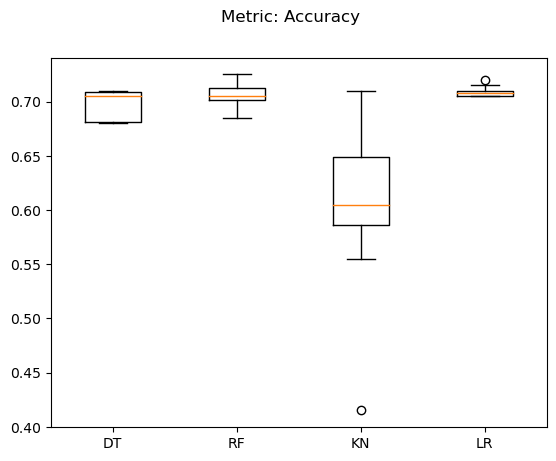

In [83]:
# Looking into the Box-Plot of the accuracy scores.
fig = plt.figure()
fig.suptitle('Metric: Accuracy')
ax = fig.add_subplot(1,1,1)
plt.boxplot(resultsA)
ax.set_xticklabels(mIDsA)
plt.show()

In [84]:
# Looping through the models based on the area under the roc curve, appending the scores and displaying them.
metricr = 'roc_auc'
resultsR = []
mIDsR = []

for mID, mdl in models:
    kff = model_selection.StratifiedKFold(n_splits=10)
    cvresr = model_selection.cross_val_score(mdl, xf, yf, cv=kff, scoring=metricr)
    resultsR.append(cvresr)
    mIDsR.append(mID)
    print("%s: %3f (%3f)" % (mID, cvresr.mean(), cvresr.std()))

DT: 0.546087 (0.062705)
RF: 0.509816 (0.115638)
KN: 0.401141 (0.146016)
LR: 0.645557 (0.041280)


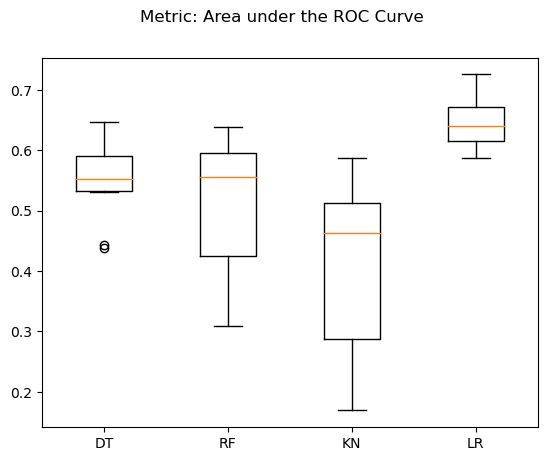

In [85]:
# Looking into the Box-Plot of the roc curve scores.
fig = plt.figure()
fig.suptitle('Metric: Area under the ROC Curve')
ax = fig.add_subplot(1,1,1)
plt.boxplot(resultsR)
ax.set_xticklabels(mIDsR)
plt.show()

### Question 10. Use the entire dataset to develop a final version of the recommended model for testing. Provide all details of the model (and the tree if the recommended model is the decision tree). What is that accuracy of this model on the training dataset?

In [86]:
# Taking all independent variables together separately.
x_final = customers.copy()
x_final = x_final.drop(['response'], axis = 1)
x_final

,elpsdm,ordfreq,ordcat,log_revlast,log_n24,log_rev24
0,24,1,6,2.995732,0.693147,3.401197
1,24,1,6,2.995732,3.218876,5.332719
2,24,1,6,2.708050,1.609438,3.951244
3,24,1,6,2.708050,2.397895,4.653960
4,24,1,6,2.833213,0.693147,3.465736
...,...,...,...,...,...,...
1995,1,2,6,2.995732,2.484907,4.653960
1996,1,2,6,1.609438,3.583519,6.666957
1997,1,1,7,4.605170,1.945910,6.028279
1998,1,1,7,3.218876,1.609438,4.343805


In [87]:
# Separating the dependent variable response. 
y_final = customers['response'].to_numpy()
y_final

array([1, 0, 0, ..., 0, 0, 0])

In [88]:
# Performing Logistic Regression on the Entire Dataset.
logistic_reg = linear_model.LogisticRegression(random_state=1).fit(x_final, y_final)

In [89]:
# Displaying the coefficients and the intercept for the model
print("Coefficients:", logistic_reg.coef_)
print("Intercept:", logistic_reg.intercept_)

Coefficients: [[-0.03544893  0.17854778 -0.16211307 -0.00956826  0.16795431 -0.16942826]]
Intercept: [0.61296421]


In [90]:
# Predicting the result on the training data
y_train_predict = logistic_reg.predict(x_final)

In [91]:
# Calculating and displaying the accuracy score.
training_data_accuracy = accuracy_score(y_final, y_train_predict)
print("Accuracy on Training Data:", training_data_accuracy)

Accuracy on Training Data: 0.711


### Question 11. Read the file dmtest.csv and make predictions (using the final model) on which customers are likely to respond, and which are not. The predictions have to be 0 or 1 – if the model you selected naturally gives a probability score, use 0.5 as the threshold to determine whether your prediction will be 0 or 1. For example, if you use a logistic regression model that gives you a probability estimate of 0.51, the prediction should be 1, and if it gives a probability estimate of 0.49, the prediction should be 0.  Create a file groupxxdmtest.csv that adds a column named “prediction” to the original variables in dmtest.csv and submit it with your report. I will assess the quality of your predictions based on the actual values (which are not included in dmtest.csv).

In [92]:
# Reading in the test dataset
customers_test = pd.read_csv('/Users/ramyavissapragada/Desktop/buan6383/dmtest.csv')
customers_test

,id,n24,rev24,revlast,elpsdm,ordfreq,ordcat
0,5001,5,186.0,18,24,1,6
1,5002,2,30.0,15,24,1,6
2,5003,24,362.0,30,24,1,7
3,5004,4,41.0,15,24,1,6
4,5005,5,59.0,18,24,1,6
...,...,...,...,...,...,...,...
1995,6996,9,165.0,0,1,1,7
1996,6997,11,149.0,15,1,3,6
1997,6998,18,161.0,13,1,2,5
1998,6999,26,427.0,25,1,4,7


In [93]:
# Transforming the revlast column so that the features match with that of training set
ct = 0.000001
customers_test['log_revlast'] = np.log(customers_test['revlast'] + ct)

In [94]:
#  Transforming the n24 and rev24 columns so that the features match with that of training set
columns = ['n24', 'rev24']
for col in columns:
        customers_test['log_' + col] = np.log(customers_test[col])

In [95]:
# Dropping the unnecessary columns.
customers_test = customers_test.drop(['id', 'n24', 'rev24', 'revlast'], axis=1)

In [96]:
# Viewing the dataset
customers_test

,elpsdm,ordfreq,ordcat,log_revlast,log_n24,log_rev24
0,24,1,6,2.890372,1.609438,5.225747
1,24,1,6,2.708050,0.693147,3.401197
2,24,1,7,3.401197,3.178054,5.891644
3,24,1,6,2.708050,1.386294,3.713572
4,24,1,6,2.890372,1.609438,4.077537
...,...,...,...,...,...,...
1995,1,1,7,-13.815511,2.197225,5.105945
1996,1,3,6,2.708050,2.397895,5.003946
1997,1,2,5,2.564949,2.890372,5.081404
1998,1,4,7,3.218876,3.258097,6.056784


In [97]:
# Predicting the values using the logistic regression model
resp = logistic_reg.predict_proba(customers_test)[:, 1]

In [98]:
# Deciding the output value by taking the threshold value as 0.5
# So, if the predicted probability is >= 0.5, the output will be 1
# If the predicted probability is < 0.5, the output will be 0
customer_response = (resp >= 0.5).astype(int)

In [99]:
# Saving the predicted outcomes into a new column 'prediction'
customers_test['prediction'] = customer_response

In [114]:
# Creating a new file (group11dmtest.csv) to add the 'predict' column into it.
customers_test.to_csv('group11dmtest.csv', index=False)

### Question 12. If you were to focus on the “lapsing customers” (customers who made their last purchase 13 to 24 months ago), do you expect your model to be different? For the selected model, compare the quality of predictions for these customers relative to predictions for the others on records in the training set. Discuss your findings. 

In [101]:
# Separating the lapsing customers
cust_lapsing = customers.copy()

In [102]:
# Looking into the dataset
cust_lapsing

,elpsdm,ordfreq,ordcat,response,log_revlast,log_n24,log_rev24
0,24,1,6,1,2.995732,0.693147,3.401197
1,24,1,6,0,2.995732,3.218876,5.332719
2,24,1,6,0,2.708050,1.609438,3.951244
3,24,1,6,0,2.708050,2.397895,4.653960
4,24,1,6,0,2.833213,0.693147,3.465736
...,...,...,...,...,...,...,...
1995,1,2,6,0,2.995732,2.484907,4.653960
1996,1,2,6,0,1.609438,3.583519,6.666957
1997,1,1,7,0,4.605170,1.945910,6.028279
1998,1,1,7,0,3.218876,1.609438,4.343805


In [103]:
# Creating a subset of customers who are lapsing customers by specifying the condition below.
lapsing_customers = cust_lapsing[(cust_lapsing['elpsdm'] >= 13) & (cust_lapsing['elpsdm'] <= 24)]
lapsing_customers

,elpsdm,ordfreq,ordcat,response,log_revlast,log_n24,log_rev24
0,24,1,6,1,2.995732,0.693147,3.401197
1,24,1,6,0,2.995732,3.218876,5.332719
2,24,1,6,0,2.708050,1.609438,3.951244
3,24,1,6,0,2.708050,2.397895,4.653960
4,24,1,6,0,2.833213,0.693147,3.465736
...,...,...,...,...,...,...,...
1648,13,1,7,0,3.555348,1.386294,4.744932
1649,13,4,5,0,1.609438,3.367296,5.117994
1650,13,4,4,0,1.098613,2.564949,3.713572
1651,13,4,7,0,3.688879,1.945910,5.424950


In [104]:
# Taking the dependent variable separately.
lapsing_responses_actual = lapsing_customers['response'].to_numpy()

In [105]:
# Creating a subset of customers who are not lapsing customers by specifying the condition below.
others = cust_lapsing[(cust_lapsing['elpsdm'] < 13) | (cust_lapsing['elpsdm'] > 24)]
others

,elpsdm,ordfreq,ordcat,response,log_revlast,log_n24,log_rev24
1653,12,1,6,1,2.995732,0.000000,2.995732
1654,12,4,4,1,1.098613,2.484907,4.127134
1655,12,4,6,1,2.995732,2.833213,5.501258
1656,12,2,7,1,3.367296,1.945910,5.187386
1657,12,4,5,1,1.098613,1.609438,3.178054
...,...,...,...,...,...,...,...
1995,1,2,6,0,2.995732,2.484907,4.653960
1996,1,2,6,0,1.609438,3.583519,6.666957
1997,1,1,7,0,4.605170,1.945910,6.028279
1998,1,1,7,0,3.218876,1.609438,4.343805


In [106]:
# Taking the dependent variable separately.
others_responses_actual = others['response'].to_numpy()

In [107]:
# Taking the independent variables for both the subsets.
lapsing_customers = lapsing_customers.drop(['response'], axis=1)
others = others.drop(['response'], axis=1)

In [108]:
# Viewing the independent variables dataset
lapsing_customers

,elpsdm,ordfreq,ordcat,log_revlast,log_n24,log_rev24
0,24,1,6,2.995732,0.693147,3.401197
1,24,1,6,2.995732,3.218876,5.332719
2,24,1,6,2.708050,1.609438,3.951244
3,24,1,6,2.708050,2.397895,4.653960
4,24,1,6,2.833213,0.693147,3.465736
...,...,...,...,...,...,...
1648,13,1,7,3.555348,1.386294,4.744932
1649,13,4,5,1.609438,3.367296,5.117994
1650,13,4,4,1.098613,2.564949,3.713572
1651,13,4,7,3.688879,1.945910,5.424950


In [109]:
# Viewing the independent variables dataset
others

,elpsdm,ordfreq,ordcat,log_revlast,log_n24,log_rev24
1653,12,1,6,2.995732,0.000000,2.995732
1654,12,4,4,1.098613,2.484907,4.127134
1655,12,4,6,2.995732,2.833213,5.501258
1656,12,2,7,3.367296,1.945910,5.187386
1657,12,4,5,1.098613,1.609438,3.178054
...,...,...,...,...,...,...
1995,1,2,6,2.995732,2.484907,4.653960
1996,1,2,6,1.609438,3.583519,6.666957
1997,1,1,7,4.605170,1.945910,6.028279
1998,1,1,7,3.218876,1.609438,4.343805


In [110]:
# Predicting for lapsing customers
lapsing_resp_predict = logistic_reg.predict(lapsing_customers)

In [111]:
# Calculating and displaying the accuracy score.
lapsing_accuracy = accuracy_score(lapsing_responses_actual, lapsing_resp_predict)
print("Accuracy on Training Data:", lapsing_accuracy)

Accuracy on Training Data: 0.7229280096793709


In [112]:
# Predicting for other customers
others_resp_predict = logistic_reg.predict(others)

In [113]:
# Calculating and displaying the accuracy score.
other_customers_accuracy = accuracy_score(others_responses_actual, others_resp_predict)
print("Accuracy on Training Data:", other_customers_accuracy)

Accuracy on Training Data: 0.654178674351585
